## CUSTOMER SEGMENTATION

Declaring necessary libraries

In [39]:
# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#### Read Data from Feather Files

Read feather file as a pandas dataframe to perform ML works on it

In [41]:
t_company_type_df= pd.read_feather('data/tk_data.feather')

#### MACHINE LEARNING

The ML is implemented to segment customer portfolio into clusters based on their risks. Firstly, the customer portfolio divided into two groups: T type and G type customers. Due to the differences between their attributes, this was inevitable step to be done. T type customers both have non-cash and cash type limits and risks, meanwhile G type customers only have cash type limits and risks. Also, it is crucial to define type of machine learning. Due to the attributes, it will be unsupervised learning. As observed, all attributes will be used are features. For providing accurate solution, we obtained that classification of the customer portfolio is a must requirements. In this sense, **K-means** is going to implemented.

Next, the datasets is prepared for the clustering. There is a need of deriving new attributes by using existing ones. Thus, the feature extraction must be done before putting data into model. In addition to this, data scaling is another significant task to complete. According to Dong, Zhang, and Chen (2020), *data scaling is a technique used in machine learning to adjust the range of features in a dataset, typically to a common scale between zero and one or -1 and 1.* The purpose of data scaling is to standardize the data, mitigate the impact of outliers, and ensure that all features are treated equally during model training. As stated in the paper, we are looking forward to handle large range of magnitudes with this method.

Moreover, the optimal number of clusters are obtained by using Elbow Method from the data. The elbow method is a critical technique for selecting the optimal number of clusters in k-means clustering, as it provides an objective way to determine the appropriate number of clusters and helps to prevent overfitting and improve the interpretability of the resulting clusters (Tang & Zhang, 2019). After this, we are going to train the model with the train dataset.

After these steps, the accuracy of K-means model must be found out. Also, other appropriate unsupervised ML modelling techniques are going to be compared. The most fitting model's results are going to be saved into a feather file. The feather file directory is going to be integrated our data-oriented web application for strong Business Intelligence presentation.

To conclude, our steps are;

*   *Preprocess Data*
*   *Feature Extraction*
*   **Scaling Data**
*   **Elbow Method**
*   **Putting Data into the K-Means Model**
*   **Optimizing Number of Clusters**
*   **Saving Results into Feather File**
*   *Presenting Results via Streamlit Web-App*

We are implementing Scaling Data, Elbow Method, K-means Model on this workbook.

| TOPIC | EXPLANATION |
| -------- | ------- |
| Scaling | Scaling data to make data range feasible for ML |
| Elbow Method | We decide optimal number of clusters |
| K-Means | Performing clustering |
| Optimize | Comparing cluster numbers' stats to decide most efficient solution |

In [42]:
t_company_type_df.head()

,MUSTERI_ID,ID,CEK_NO,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,TK_KURUMSAYISI,...,KESIDECI_COUNT,CEK_INCOME,CEK_LOSS,CEK_GELIR_PERCENTAGE,TRANSACTIONS_FREQ,One Timer,Very Often,Often,Rare,DAYS_SINCE_LAST_TRANSACTION
0,11820145,2457923,3062309,11000.0,9490.0,0.0,0.0,0.0,0.0,1,...,24,230234.5,325980.0,0.413931,Very Often,0,1,0,0,1
1,11672216,2457924,80075,6903025.0,3095925.0,1049450.0,45637.0,12.0,134953.0,14,...,37,205000.0,945708.7,0.178151,Very Often,0,1,0,0,1
2,11672216,2457925,1009838,6903025.0,3095925.0,1049450.0,45637.0,12.0,134953.0,14,...,37,205000.0,945708.7,0.178151,Very Often,0,1,0,0,1
3,11672216,2457926,1009837,6903025.0,3095925.0,1049450.0,45637.0,12.0,134953.0,14,...,37,205000.0,945708.7,0.178151,Very Often,0,1,0,0,1
4,11672216,2457927,8005059,6903025.0,3095925.0,1049450.0,45637.0,12.0,134953.0,14,...,37,205000.0,945708.7,0.178151,Very Often,0,1,0,0,1


#### Group by Customers into a Single Record using Mean Method

By reducing their records as one, we evolve them in clustering. It is inevitable step for clustering customers

In [ ]:
del t_company_type_df['ID']
del t_company_type_df['CEK_NO']

In [44]:
# group customers by average before putting into model
# because there may be multiple transactions for a customer
t_company_type_df = t_company_type_df.groupby('MUSTERI_ID').mean()

In [45]:
t_company_type_df.head()

,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,TK_KURUMSAYISI,MUSTERI_RISK_SEVIYESI,TOTAL_RISK,TOTAL_LIMIT,TK_ORAN,KESIDECI_COUNT,CEK_INCOME,CEK_LOSS,CEK_GELIR_PERCENTAGE,One Timer,Very Often,Often,Rare,DAYS_SINCE_LAST_TRANSACTION
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,
1,1799744.0,1.052830e+06,1.203670e+05,4.800000e+04,0.000000,0.000000,3.0,0.000000,1.100830e+06,1.920111e+06,1.744239,1.0,0.0,250000.0,0.0,1.0,0.0,0.0,0.0,190.0
49,5281273.0,4.248890e+06,1.050473e+06,2.360000e+04,0.000000,0.000000,3.0,0.000000,4.272490e+06,6.331746e+06,1.481980,1.0,0.0,104800.0,0.0,1.0,0.0,0.0,0.0,236.0
54,8079040.9,4.934844e+06,5.019065e+06,1.849047e+06,0.000000,0.000000,10.3,0.000000,6.783890e+06,1.309811e+07,1.944128,4.0,0.0,986983.9,0.0,0.0,1.0,0.0,0.0,110.0
55,10682026.0,7.851813e+06,4.732608e+06,1.070267e+05,1.800000,43555.333333,14.0,0.000000,7.958840e+06,1.541463e+07,1.945624,8.0,0.0,1430000.0,0.0,0.0,1.0,0.0,0.0,206.0
60,8320019.0,2.544960e+06,5.372487e+06,2.181257e+06,4.285714,145573.714286,14.0,1.714286,4.726217e+06,1.369251e+07,2.906367,7.0,0.0,1110018.1,0.0,0.0,1.0,0.0,0.0,142.0


#### Scaling Data

In [46]:
# selecting the columns to be scaled
columns_to_scale = ['CEK_INCOME', 'TK_GECIKMEBAKIYE', 'TK_GECIKMEHESAP',
            'TK_KURUMSAYISI','TK_ORAN','KESIDECI_COUNT','CEK_GELIR_PERCENTAGE','DAYS_SINCE_LAST_TRANSACTION']

scaled_tType_df = t_company_type_df[columns_to_scale]         # creating a new dataframe with the selected columns

#### Understanding the Distribution to Choose Best Scaling Technique

      credibility ↑      TK_ORAN ↑
      credibility ↑      TK_GECIKMEHESAP ↓
      credibility ↑      TK_GECIKMEBAKIYE ↓

We are going to observe the distribution of each first.

In [137]:
scaled_tType_df['TK_GECIKMEBAKIYE'].value_counts().sort_index(ascending=True)

0.0           184070
1.0              445
2.0              258
3.0              233
4.0               54
               ...  
3811327.0          2
4214703.0          1
10992775.0         1
12850940.0         2
39972513.0         8
Name: TK_GECIKMEBAKIYE, Length: 14969, dtype: int64

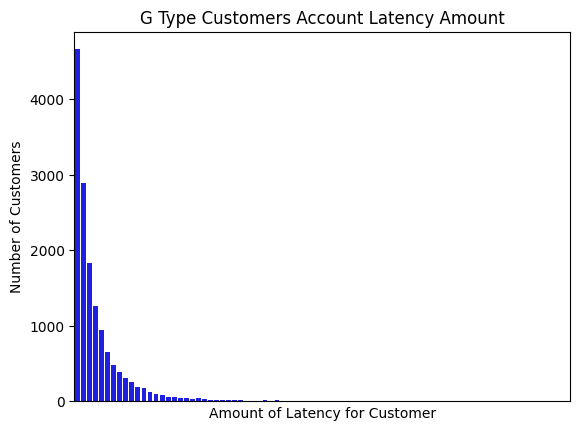

In [138]:
# created a data frame for TK account latency amount
TK_gecikmebakiye_df=scaled_tType_df['TK_GECIKMEBAKIYE'].value_counts().sort_index(ascending=True)

# visualizing it using seaborn library
sns.countplot(data=TK_gecikmebakiye_df, x=TK_gecikmebakiye_df.values, color='blue')
plt.xticks([])              # hide x-axis tick labels
plt.title('G Type Customers Account Latency Amount')
plt.xlabel('Amount of Latency for Customer')
plt.ylabel('Number of Customers')
plt.show()

In [139]:
scaled_tType_df['TK_ORAN'].value_counts().sort_index(ascending=True)

0.000000e+00    69213
2.720085e-08        3
7.012524e-08        1
8.601181e-08        1
9.543624e-08        6
                ...  
3.550000e+07        4
3.553369e+07        1
4.477536e+07        1
5.650000e+07       21
9.332000e+07        1
Name: TK_ORAN, Length: 56502, dtype: int64

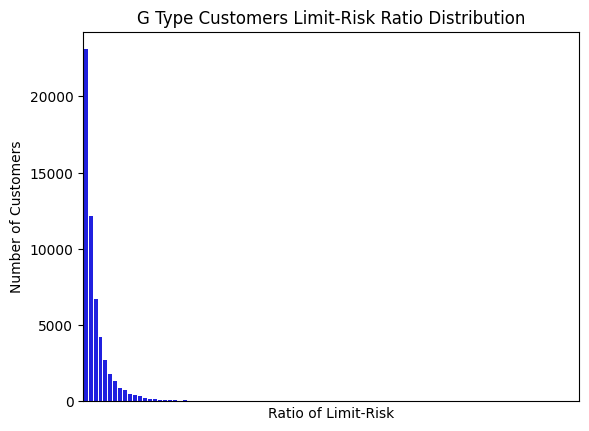

In [140]:
# created a data frame for TK ratio
TK_oran_df=scaled_tType_df['TK_ORAN'].value_counts().sort_index(ascending=True)
# visualizing it using seaborn library
sns.countplot(data=TK_oran_df, x=TK_oran_df.values, color='blue')
plt.xticks([])              # hide x-axis tick labels
plt.title('G Type Customers Limit-Risk Ratio Distribution')
plt.xlabel('Ratio of Limit-Risk')
plt.ylabel('Number of Customers')
plt.show()

In [141]:
scaled_tType_df['CEK_INCOME'].value_counts().sort_index(ascending=True)

0.000000e+00    55617
1.500000e+03       14
1.707000e+03        7
1.900000e+03        1
2.056000e+03        6
                ...  
1.025512e+06      180
1.036135e+06      168
1.123954e+06      329
1.268540e+06       95
2.601867e+06      105
Name: CEK_INCOME, Length: 6657, dtype: int64

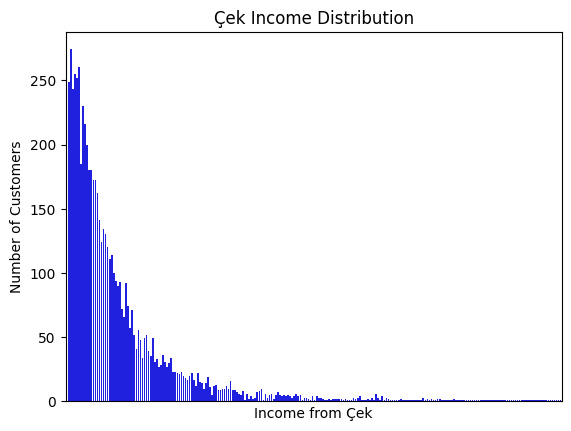

In [142]:
# created a data frame for customer income first
cek_income_df=scaled_tType_df['CEK_INCOME'].value_counts().sort_index(ascending=True)
# visualizing it using seaborn library
sns.countplot(data=cek_income_df, x=cek_income_df.values, color='blue', linewidth=2)
plt.xticks([])              # hide x-axis tick labels
plt.title('Çek Income Distribution')
plt.xlabel('Income from Çek')
plt.ylabel('Number of Customers')
plt.show()

#### Imputing Data

As seen from distributions, there are many 0 values which may prevent the exact result of clustering. 0 values are imputed with mean values. To do this operation, it is significant to analyze the characteristics of the attributes:

* **TK_ORAN** shows the limit-risk ratio. we know that it is impossible to have 0 value both for limit and risk. so, when TK_ORAN is 0, then fill it with mean value of TK_ORAN column.
* **TK_GECIKMEHESAP** represents the number of accounts which has latency. If it is 0, this means there are no account with payment latency. So it is not possible to impute values of TK_GECIKMEHESAP. **We cannot change TK_GECIKMEBAKIYE as well.**

In [47]:
scaled_tType_df['TK_ORAN']= scaled_tType_df['TK_ORAN'].replace(0, scaled_tType_df['TK_ORAN'].mean())

C:\Users\emirh\AppData\Local\Temp\ipykernel_13468\2994460513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_tType_df['TK_ORAN']= scaled_tType_df['TK_ORAN'].replace(0, scaled_tType_df['TK_ORAN'].mean())


#### Scaling the Data using Scikit-Learn Library

**Standard Scaling** is more efficient for us by comparing with *Min-Max Scaling*.
*   The distribution of attributes navigates us to implement Standard Scaling
*   Standard Scale fixes std as same value *(approx. 1)* meanwhile Min-Max Scaling focuses on data range

In [48]:
# declaring scale module here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Normalizing data here

In [49]:
scaled_tType_df[columns_to_scale] = scaler.fit_transform(scaled_tType_df[columns_to_scale])

C:\Users\emirh\AppData\Local\Temp\ipykernel_13468\3197337338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_tType_df[columns_to_scale] = scaler.fit_transform(scaled_tType_df[columns_to_scale])


In [50]:
scaled_tType_df.head(5)

,CEK_INCOME,TK_GECIKMEBAKIYE,TK_GECIKMEHESAP,TK_KURUMSAYISI,TK_ORAN,KESIDECI_COUNT,CEK_GELIR_PERCENTAGE,DAYS_SINCE_LAST_TRANSACTION
MUSTERI_ID,,,,,,,,
1,-0.506394,-0.050763,-0.343667,0.121908,-0.109444,-0.512884,-0.605595,0.817044
49,-0.506394,-0.050763,-0.343667,0.121908,-0.109445,-0.512884,-0.605595,1.293174
54,-0.506394,-0.050763,-0.343667,2.470762,-0.109444,-0.152451,-0.605595,-0.011007
55,-0.506394,0.142956,0.587764,3.661277,-0.109444,0.328127,-0.605595,0.982655
60,-0.506394,0.596697,1.874027,3.661277,-0.109443,0.207982,-0.605595,0.320213


In [22]:
scaled_tType_df.describe()    # to check whether the scaling is done or not by controlling the min and max values as 0 and 1

,CEK_INCOME,TK_GECIKMEBAKIYE,TK_GECIKMEHESAP,TK_KURUMSAYISI,TK_ORAN,KESIDECI_COUNT,CEK_GELIR_PERCENTAGE
count,2.888100e+04,2.888100e+04,2.888100e+04,2.888100e+04,2.888100e+04,2.888100e+04,2.888100e+04
mean,4.723666e-17,8.856874e-18,-8.266416e-17,3.149111e-17,-2.460243e-18,-3.149111e-17,-6.150607e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-5.063935e-01,-5.076264e-02,-3.436674e-01,-8.433748e-01,-1.094461e-01,-5.128836e-01,-6.055954e-01
25%,-5.063935e-01,-5.076264e-02,-3.436674e-01,-8.433748e-01,-1.094446e-01,-5.128836e-01,-6.055954e-01
50%,-5.063935e-01,-5.076264e-02,-3.436674e-01,-2.718891e-01,-1.094422e-01,-3.927393e-01,-6.055954e-01
75%,1.147600e-01,-4.938153e-02,-8.493632e-02,4.436686e-01,-2.547084e-02,8.783793e-02,2.793878e-01
max,3.387997e+01,1.536071e+02,3.122152e+01,6.878886e+00,9.078073e+01,2.147353e+01,3.297766e+00


#### Feature Selecting

Declare attributes that will be used on clustering

In [55]:
# selecting the input columns for clustering
feature_columns_t_Type = ['TK_ORAN', 'TK_GECIKMEHESAP', 'TK_GECIKMEBAKIYE','CEK_INCOME',
            'KESIDECI_COUNT','One Timer','Very Often','Often','Rare','CEK_GELIR_PERCENTAGE','DAYS_SINCE_LAST_TRANSACTION']

In [56]:
t_company_type = t_company_type_df.copy()        # creating a copy of the main dataframe and will be use on k-means clustering

# now append scaled versions into main dataframe's copy
t_company_type[['TK_GECIKMEBAKIYE', 'TK_GECIKMEHESAP','TK_ORAN', 'CEK_INCOME','TK_KURUMSAYISI',
        'KESIDECI_COUNT','CEK_GELIR_PERCENTAGE','DAYS_SINCE_LAST_TRANSACTION']] = scaled_tType_df[['TK_GECIKMEBAKIYE',
        'TK_GECIKMEHESAP','TK_ORAN', 'CEK_INCOME','TK_KURUMSAYISI','KESIDECI_COUNT','CEK_GELIR_PERCENTAGE','DAYS_SINCE_LAST_TRANSACTION']]

#### Elbow Method

We aim to maximize the efficiency of segmentation while minimizing the number of clusters. In this sense, Elbow Method is crucial concept to satisfy this requirement.

In [52]:
# importing scikit-learning library for the K-means model
from sklearn.cluster import KMeans

Declare the Elbow Method function here

In [26]:
def find_optimal_clusters(df, maximum_K):
    clusters_centers = []   # appending inertia value coming from the model
    k_values = []           # putting k values from 0 to maximum K

    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

*Note About **Inertia***:

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. **A good model is one with low inertia** and **a low number of clusters** (K) *-Codeacademy*

In the next step, illustrating an elbow method for the data using a function

In [27]:
def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'blue')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of Model")
    plt.show()

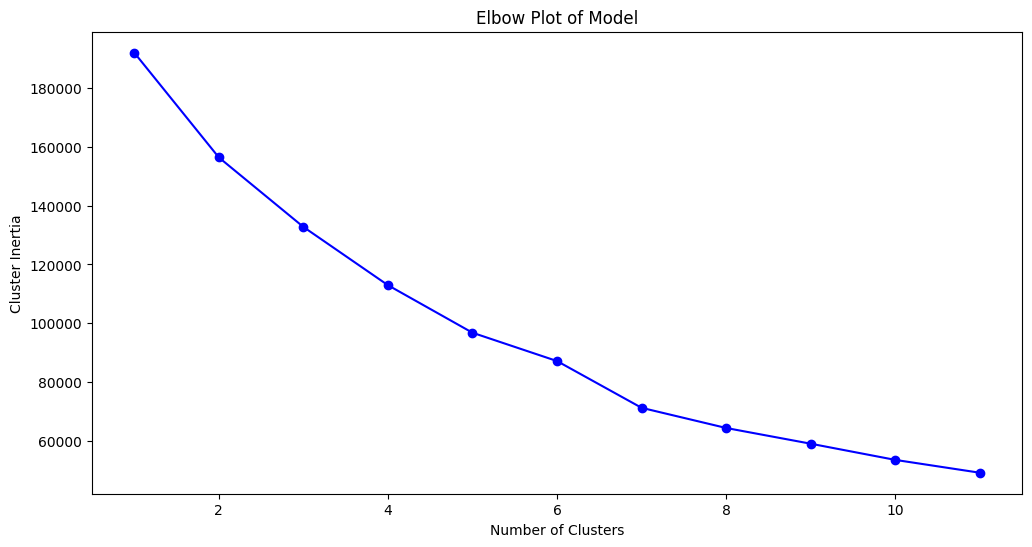

In [28]:
clusters_centers, k_values = find_optimal_clusters(t_company_type[feature_columns_t_Type], 12)
generate_elbow_plot(clusters_centers, k_values)

#### Putting Into K-means Model

>> Implement cluster amount as 5 first

In [29]:
t_kmeans = KMeans(n_clusters=5, random_state=42)            # initialize the k-means model by using the optimal number of clusters found in the elbow method
t_kmeans.fit = t_kmeans.fit(t_company_type[feature_columns_t_Type])                 # fit the k-means model to the data

t_company_type['CLUSTER_LABELS_5'] = t_kmeans.labels_      # assign cluster labels to the original DataFrame

In [30]:
t_company_type['CLUSTER_LABELS_5'].value_counts()

0    20157
4     4987
1     2814
2      922
3        1
Name: CLUSTER_LABELS_5, dtype: int64

>> Implement cluster amount as 4 here

In [57]:
t_company_type[feature_columns_t_Type]

,TK_ORAN,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,CEK_INCOME,KESIDECI_COUNT,One Timer,Very Often,Often,Rare,CEK_GELIR_PERCENTAGE,DAYS_SINCE_LAST_TRANSACTION
MUSTERI_ID,,,,,,,,,,,
1,-0.109444,-0.343667,-0.050763,-0.506394,-0.512884,1.0,0.0,0.0,0.0,-0.605595,0.817044
49,-0.109445,-0.343667,-0.050763,-0.506394,-0.512884,1.0,0.0,0.0,0.0,-0.605595,1.293174
54,-0.109444,-0.343667,-0.050763,-0.506394,-0.152451,0.0,1.0,0.0,0.0,-0.605595,-0.011007
55,-0.109444,0.587764,0.142956,-0.506394,0.328127,0.0,1.0,0.0,0.0,-0.605595,0.982655
60,-0.109443,1.874027,0.596697,-0.506394,0.207982,0.0,1.0,0.0,0.0,-0.605595,0.320213
...,...,...,...,...,...,...,...,...,...,...,...
300188488,-0.109438,7.763239,0.377959,1.370283,1.289281,0.0,1.0,0.0,0.0,0.404017,-0.621695
300188528,-0.109444,0.173795,0.013713,-0.506394,-0.032306,0.0,0.0,1.0,0.0,-0.605595,0.485824
300188787,-0.105644,-0.343667,-0.050763,0.121368,-0.392739,0.0,0.0,1.0,0.0,1.006663,1.634745


In [58]:
t_kmeans = KMeans(n_clusters=4, random_state=42)  # initialize the k-means model
t_kmeans.fit(t_company_type)  # fit the k-means model to the data
t_company_type['CLUSTER_LABELS_4'] = t_kmeans.labels_  # assign cluster labels to the original DataFrame


See the distribution of clusters

In [60]:
t_company_type['CLUSTER_LABELS_4'].value_counts()

0    28612
3      259
2        7
1        3
Name: CLUSTER_LABELS_4, dtype: int64

In [184]:
tk_four_cluster_distribution=t_company_type['CLUSTER_LABELS_4'].value_counts()
# save this as excel file
#tk_four_cluster_distribution.to_excel('cluster_results/tk_four_cluster_distributed.xlsx')

In [64]:
# append cluster labels from t_company_type to the original DataFrame named t_company_type_df
# merge them using common ID named MUSTERI_ID
t_company_type_df = pd.merge(t_company_type_df, t_company_type[['CLUSTER_LABELS_4']], on='MUSTERI_ID')
t_company_type_df.head(10)

,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,TK_KURUMSAYISI,MUSTERI_RISK_SEVIYESI,TOTAL_RISK,TOTAL_LIMIT,...,KESIDECI_COUNT,CEK_INCOME,CEK_LOSS,CEK_GELIR_PERCENTAGE,One Timer,Very Often,Often,Rare,DAYS_SINCE_LAST_TRANSACTION,CLUSTER_LABELS_4
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
1,1.799744e+06,1.052830e+06,1.203670e+05,4.800000e+04,0.000000,0.000000,3.000000,0.000000,1.100830e+06,1.920111e+06,...,1.0,0.00,250000.0,0.000000,1.0,0.0,0.0,0.0,190.0,0
49,5.281273e+06,4.248890e+06,1.050473e+06,2.360000e+04,0.000000,0.000000,3.000000,0.000000,4.272490e+06,6.331746e+06,...,1.0,0.00,104800.0,0.000000,1.0,0.0,0.0,0.0,236.0,0
54,8.079041e+06,4.934844e+06,5.019065e+06,1.849047e+06,0.000000,0.000000,10.300000,0.000000,6.783890e+06,1.309811e+07,...,4.0,0.00,986983.9,0.000000,0.0,1.0,0.0,0.0,110.0,0
55,1.068203e+07,7.851813e+06,4.732608e+06,1.070267e+05,1.800000,43555.333333,14.000000,0.000000,7.958840e+06,1.541463e+07,...,8.0,0.00,1430000.0,0.000000,0.0,1.0,0.0,0.0,206.0,0
60,8.320019e+06,2.544960e+06,5.372487e+06,2.181257e+06,4.285714,145573.714286,14.000000,1.714286,4.726217e+06,1.369251e+07,...,7.0,0.00,1110018.1,0.000000,0.0,1.0,0.0,0.0,142.0,0
66,6.145300e+04,2.035100e+04,3.000000e+03,0.000000e+00,0.000000,0.000000,4.000000,0.000000,2.035100e+04,6.445300e+04,...,1.0,6450.00,0.0,1.000000,1.0,0.0,0.0,0.0,207.0,0
75,4.480000e+05,1.000000e+00,1.024576e+05,1.577647e+03,0.000000,0.000000,3.000000,0.000000,1.578647e+03,5.504576e+05,...,2.0,213958.25,1373143.9,0.134811,0.0,1.0,0.0,0.0,51.0,0
93,1.454601e+06,9.458703e+05,2.192000e+05,1.385877e+05,0.538462,13197.615385,6.923077,0.000000,1.084458e+06,1.673801e+06,...,8.0,220000.00,337871.8,0.394356,0.0,1.0,0.0,0.0,58.0,0
104,2.750086e+06,1.710136e+06,3.894033e+05,2.985037e+05,1.000000,143.000000,8.000000,0.000000,2.008640e+06,3.139490e+06,...,2.0,0.00,380000.0,0.000000,0.0,0.0,1.0,0.0,184.0,0


>> Implement clusters as 3 below

In [61]:
t_kmeans = KMeans(n_clusters=3, random_state=42)  # initialize the k-means model
t_kmeans.fit(t_company_type)  # fit the k-means model to the data
t_company_type['CLUSTER_LABELS_3'] = t_kmeans.labels_  # assign cluster labels to the original DataFrame


In [62]:
t_company_type['CLUSTER_LABELS_3'].value_counts()

0    28723
2      155
1        3
Name: CLUSTER_LABELS_3, dtype: int64

In [183]:
tk_three_cluster_distribution=t_company_type['CLUSTER_LABELS_3'].value_counts()
# save this as excel file
#tk_three_cluster_distribution.to_excel('cluster_results/tk_three_cluster_distributed.xlsx')

In [65]:
# append cluster labels from t_company_type to the original DataFrame named t_company_type_df
# merge them using common ID named MUSTERI_ID
t_company_type_df = pd.merge(t_company_type_df, t_company_type[['CLUSTER_LABELS_3']], on='MUSTERI_ID')
t_company_type_df.head(10)

,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,TK_KURUMSAYISI,MUSTERI_RISK_SEVIYESI,TOTAL_RISK,TOTAL_LIMIT,...,CEK_INCOME,CEK_LOSS,CEK_GELIR_PERCENTAGE,One Timer,Very Often,Often,Rare,DAYS_SINCE_LAST_TRANSACTION,CLUSTER_LABELS_4,CLUSTER_LABELS_3
MUSTERI_ID,,,,,,,,,,,,,,,,,,,,,
1,1.799744e+06,1.052830e+06,1.203670e+05,4.800000e+04,0.000000,0.000000,3.000000,0.000000,1.100830e+06,1.920111e+06,...,0.00,250000.0,0.000000,1.0,0.0,0.0,0.0,190.0,0,0
49,5.281273e+06,4.248890e+06,1.050473e+06,2.360000e+04,0.000000,0.000000,3.000000,0.000000,4.272490e+06,6.331746e+06,...,0.00,104800.0,0.000000,1.0,0.0,0.0,0.0,236.0,0,0
54,8.079041e+06,4.934844e+06,5.019065e+06,1.849047e+06,0.000000,0.000000,10.300000,0.000000,6.783890e+06,1.309811e+07,...,0.00,986983.9,0.000000,0.0,1.0,0.0,0.0,110.0,0,0
55,1.068203e+07,7.851813e+06,4.732608e+06,1.070267e+05,1.800000,43555.333333,14.000000,0.000000,7.958840e+06,1.541463e+07,...,0.00,1430000.0,0.000000,0.0,1.0,0.0,0.0,206.0,0,0
60,8.320019e+06,2.544960e+06,5.372487e+06,2.181257e+06,4.285714,145573.714286,14.000000,1.714286,4.726217e+06,1.369251e+07,...,0.00,1110018.1,0.000000,0.0,1.0,0.0,0.0,142.0,0,0
66,6.145300e+04,2.035100e+04,3.000000e+03,0.000000e+00,0.000000,0.000000,4.000000,0.000000,2.035100e+04,6.445300e+04,...,6450.00,0.0,1.000000,1.0,0.0,0.0,0.0,207.0,0,0
75,4.480000e+05,1.000000e+00,1.024576e+05,1.577647e+03,0.000000,0.000000,3.000000,0.000000,1.578647e+03,5.504576e+05,...,213958.25,1373143.9,0.134811,0.0,1.0,0.0,0.0,51.0,0,0
93,1.454601e+06,9.458703e+05,2.192000e+05,1.385877e+05,0.538462,13197.615385,6.923077,0.000000,1.084458e+06,1.673801e+06,...,220000.00,337871.8,0.394356,0.0,1.0,0.0,0.0,58.0,0,0
104,2.750086e+06,1.710136e+06,3.894033e+05,2.985037e+05,1.000000,143.000000,8.000000,0.000000,2.008640e+06,3.139490e+06,...,0.00,380000.0,0.000000,0.0,0.0,1.0,0.0,184.0,0,0


#### Observe the Efficiency of Clustering

Compare the efficiency with respect to **MUSTERI_RISK_SEVIYESI** attribute which defined by company

>> For the case **cluster number is 4**

In [66]:
t_company_type_df.groupby('CLUSTER_LABELS_4').mean().sort_values('MUSTERI_RISK_SEVIYESI', ascending=False)

,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,TK_KURUMSAYISI,MUSTERI_RISK_SEVIYESI,TOTAL_RISK,TOTAL_LIMIT,...,KESIDECI_COUNT,CEK_INCOME,CEK_LOSS,CEK_GELIR_PERCENTAGE,One Timer,Very Often,Often,Rare,DAYS_SINCE_LAST_TRANSACTION,CLUSTER_LABELS_3
CLUSTER_LABELS_4,,,,,,,,,,,,,,,,,,,,,
1,9.447612e+08,7.846796e+08,3.462692e+08,1.345546e+08,2.466667,1.209295e+07,15.666667,2.000000,9.192342e+08,1.291030e+09,...,9.666667,0.000000,1.388270e+06,0.000000,0.666667,0.333333,0.000000,0.000000,60.666667,1.000000
2,1.770784e+08,1.297111e+08,7.837283e+07,2.362230e+07,11.257143,3.094127e+06,14.571429,0.857143,1.533334e+08,2.554512e+08,...,2.428571,0.000000,7.813992e+05,0.000000,0.714286,0.285714,0.000000,0.000000,113.571429,2.000000
3,3.149080e+07,2.015273e+07,1.309195e+07,3.602335e+06,2.663036,1.447745e+05,12.143089,0.305833,2.375507e+07,4.458275e+07,...,5.972973,29364.899842,7.947947e+05,0.031383,0.606178,0.347490,0.030888,0.015444,131.706564,1.142857
0,8.086036e+05,4.660747e+05,2.194441e+05,6.184688e+04,0.643265,8.185231e+03,2.530637,0.096064,5.279216e+05,1.028048e+06,...,5.262757,38411.033064,2.678559e+05,0.156322,0.357472,0.447784,0.155564,0.039179,110.881239,0.000000


In [71]:
t_company_type_df.groupby('CLUSTER_LABELS_4').mean().sort_values('MUSTERI_RISK_SEVIYESI', ascending=False)['MUSTERI_RISK_SEVIYESI']

CLUSTER_LABELS_4
1    2.000000
2    0.857143
3    0.305833
0    0.096064
Name: MUSTERI_RISK_SEVIYESI, dtype: float64

In [166]:
tk_four_cluster=t_company_type_df.groupby('CLUSTER_LABELS_4').mean().sort_values('MUSTERI_RISK_SEVIYESI', ascending=False)
# save this as excel file
#tk_four_cluster.to_excel('cluster_results/tk_four_cluster.xlsx')

>> For the case, **number of clusters is equal to 3**

In [67]:
t_company_type_df.groupby('CLUSTER_LABELS_3').mean().sort_values('MUSTERI_RISK_SEVIYESI', ascending=False)

,TK_NAKDILIMIT,TK_NAKDIRISK,TK_GAYRINAKDILIMIT,TK_GAYRINAKDIRISK,TK_GECIKMEHESAP,TK_GECIKMEBAKIYE,TK_KURUMSAYISI,MUSTERI_RISK_SEVIYESI,TOTAL_RISK,TOTAL_LIMIT,...,KESIDECI_COUNT,CEK_INCOME,CEK_LOSS,CEK_GELIR_PERCENTAGE,One Timer,Very Often,Often,Rare,DAYS_SINCE_LAST_TRANSACTION,CLUSTER_LABELS_4
CLUSTER_LABELS_3,,,,,,,,,,,,,,,,,,,,,
1,9.447612e+08,7.846796e+08,3.462692e+08,1.345546e+08,2.466667,1.209295e+07,15.666667,2.000000,9.192342e+08,1.291030e+09,...,9.666667,0.000000,1.388270e+06,0.000000,0.666667,0.333333,0.000000,0.000000,60.666667,1.000000
2,4.687842e+07,2.967744e+07,2.029300e+07,5.486334e+06,3.152904,3.158354e+05,12.688433,0.407961,3.516378e+07,6.717142e+07,...,4.593548,23722.383096,7.648141e+05,0.032488,0.664516,0.296774,0.025806,0.012903,136.658065,2.954839
0,8.796183e+05,5.174551e+05,2.462397e+05,7.024134e+04,0.650522,8.508750e+03,2.565434,0.096458,5.876964e+05,1.125858e+06,...,5.272082,38399.366978,2.700508e+05,0.155825,0.358145,0.447655,0.155102,0.039098,110.930578,0.011593


In [72]:
t_company_type_df.groupby('CLUSTER_LABELS_3').mean().sort_values('MUSTERI_RISK_SEVIYESI', ascending=False)['MUSTERI_RISK_SEVIYESI']

CLUSTER_LABELS_3
1    2.000000
2    0.407961
0    0.096458
Name: MUSTERI_RISK_SEVIYESI, dtype: float64

In [68]:
t_company_type_df['MUSTERI_RISK_SEVIYESI'].mean()

0.09832782558808499

In [168]:
tk_three_cluster=t_company_type_df.groupby('CLUSTER_LABELS_3').mean().sort_values('MUSTERI_RISK_SEVIYESI', ascending=False)
# save this as excel file
#tk_three_cluster.to_excel('cluster_results/tk_three_cluster.xlsx')

#### See the Distribution of Clusters in a Visualization

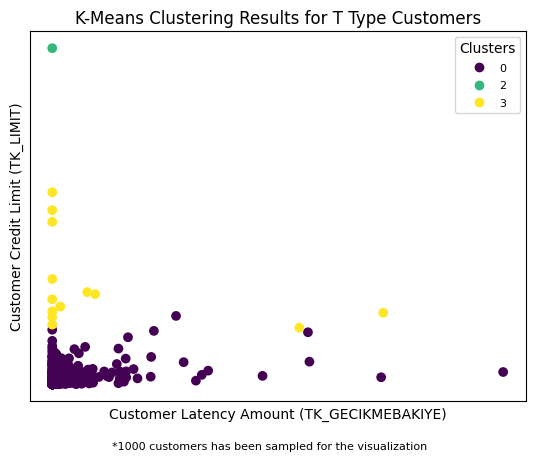

In [182]:
t_company_type_sample = t_company_type.sample(1000)     # sample 1000 customers from the dataset
scatter=plt.scatter(t_company_type_sample['TK_GECIKMEBAKIYE'], t_company_type_sample['TOTAL_LIMIT'],
        c=t_company_type_sample['CLUSTER_LABELS_4'])

plt.xlabel('Customer Latency Amount (TK_GECIKMEBAKIYE)')
plt.ylabel('Customer Credit Limit (TK_LIMIT)')
plt.title('K-Means Clustering Results for T Type Customers')
plt.xticks([], [])    # remove x and y ticks
plt.yticks([], [])
# footnote below the plot
plt.figtext(0.5, 0.01, "*1000 customers has been sampled for the visualization",
        ha="center", fontsize=8)
# add legend
plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters",fontsize=8)
plt.show()

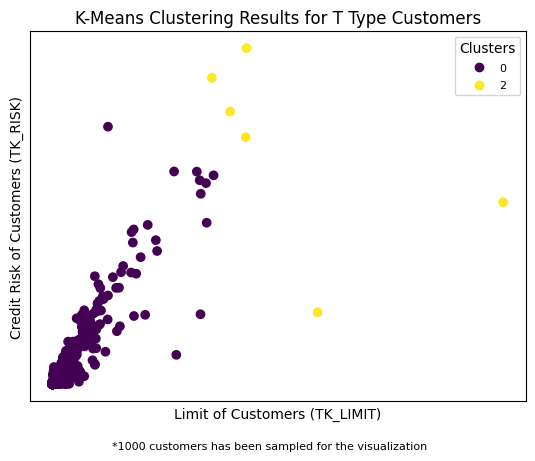

In [180]:
t_company_type_sample = t_company_type_df.sample(1000)     # sample 1000 customers from the dataset
scatter=plt.scatter(t_company_type_sample['TOTAL_LIMIT'], t_company_type_sample['TOTAL_RISK'],
        c=t_company_type_sample['CLUSTER_LABELS_3'])

plt.xlabel('Limit of Customers (TK_LIMIT)')
plt.ylabel('Credit Risk of Customers (TK_RISK)')
plt.title('K-Means Clustering Results for T Type Customers')
plt.xticks([], [])
plt.yticks([], [])
# footnote below the plot
plt.figtext(0.5, 0.01, "*1000 customers has been sampled for the visualization",
        ha="center", fontsize=8)
# add legend
plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters",fontsize=8)
plt.show()

#### Save Results to a Feather File

We are going to present results on Streamlit, so saving these are crucial

In [186]:
t_company_type_df.head(5)

,MUSTERI_ID,ID,CEK_NO,CEK_TUTAR,SIRKET_TURU,KULLANDIRIM,SUBE,KESIDECI_ID,ISLEM_TARIHI,TK_NAKDILIMIT,...,CEK_LOSS,CEK_GELIR_PERCENTAGE,AVERAGE_DAYS,TRANSACTIONS_FREQ,One Timer,Very Often,Often,Rare,CLUSTER_LABELS_4,CLUSTER_LABELS_3
0,11820145,2457923,3062309,8000.0,T,KY,IZMIR SANAYI,12054734,2018-11-30,11000.0,...,325980.0,0.413931,10.677419,Very Often,0,1,0,0,0,0
1,11820145,2458372,3062309,8000.0,T,KY,IZMIR SANAYI,12054635,2018-11-30,11000.0,...,325980.0,0.413931,10.677419,Very Often,0,1,0,0,0,0
2,11820145,2460619,2030104,40000.0,T,KY,IZMIR SANAYI,12053812,2018-11-29,11000.0,...,325980.0,0.413931,10.677419,Very Often,0,1,0,0,0,0
3,11820145,2461026,4637745,2410.0,T,KV,IZMIR SANAYI,11805747,2018-11-29,11000.0,...,325980.0,0.413931,10.677419,Very Often,0,1,0,0,0,0
4,11820145,2490538,16659,10000.0,T,KV,IZMIR SANAYI,11653732,2018-11-08,11000.0,...,325980.0,0.413931,10.677419,Very Often,0,1,0,0,0,0


In [187]:
# save to a feather file
t_company_type_df.to_feather('data/tk_customer_segmentation.feather')